<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Caminata_Aleatoria_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caminata Aleatoria 1D

Con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda, tal que $p + q = 1$.

In [68]:
import tabulate
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [69]:
def caminata(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random()
    if a<p:
      posicion=posicion+1
    else:
      posicion=posicion-1
    camino.append(posicion)
  return camino

Text(0, 0.5, 'Posicion')

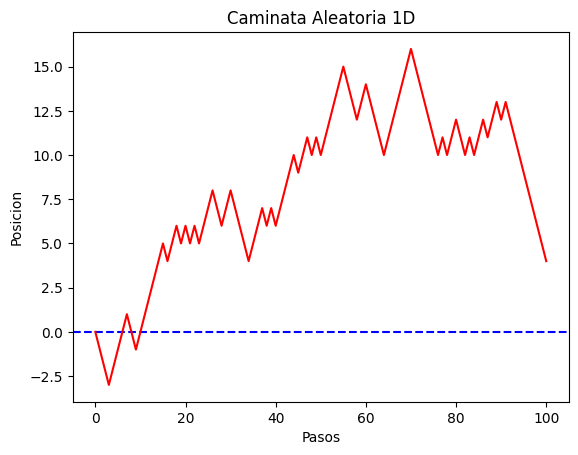

In [80]:
n=100
p=0.5

plt.title("Caminata Aleatoria 1D")
plt.axhline(0, color='blue', linestyle='--') # Draws a horizontal line at y=0
plt.plot(caminata(n,p), color='red')
plt.xlabel("Pasos")
plt.ylabel("Posicion")

¿Què preguntas surgen?